In [ ]:
# Follow the installation guide on the github page
    # clone repository
    # create virtual enviornment
    # install dependecies

In [ ]:
# In case of dependency installation error via requirements.txt, manually install the following packages:

# !pip install numpy
# !pip install rasterio 
# !pip install scipy
# !pip install PyWavelets
# !pip install scikit-learn
# !pip install numba
# !pip install tqdm
# !pip install scikit-image
# !pip install opencv-contrib-python

In [1]:
from hsi_enhancement.src import *

In [3]:
msi_path = '/path/to/msi/data/msi.tif'
hsi_path = '/path/to/hsi/data/hsi.tif'
enhancer = HSIEnhancer(msi_path, hsi_path)
hsi_enhanced = enhancer.fuse_to_enhance(
    patch_size=12,
    stride=1,
    guide_radius=10,
    detail_weight=1
)
print("Enhanced HSI shape:", hsi_enhanced.shape)

Processing patches: 100%|██████████| 9701/9701 [00:07<00:00, 1291.98it/s]


Enhanced HSI shape: (300, 360, 242)


In [4]:
hsi = HSIDataLoader.load_image(hsi_path)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Set up figure styles
plt.style.use(['default'])
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.titleweight'] = 'normal'
mpl.rcParams['savefig.dpi'] = 350
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2

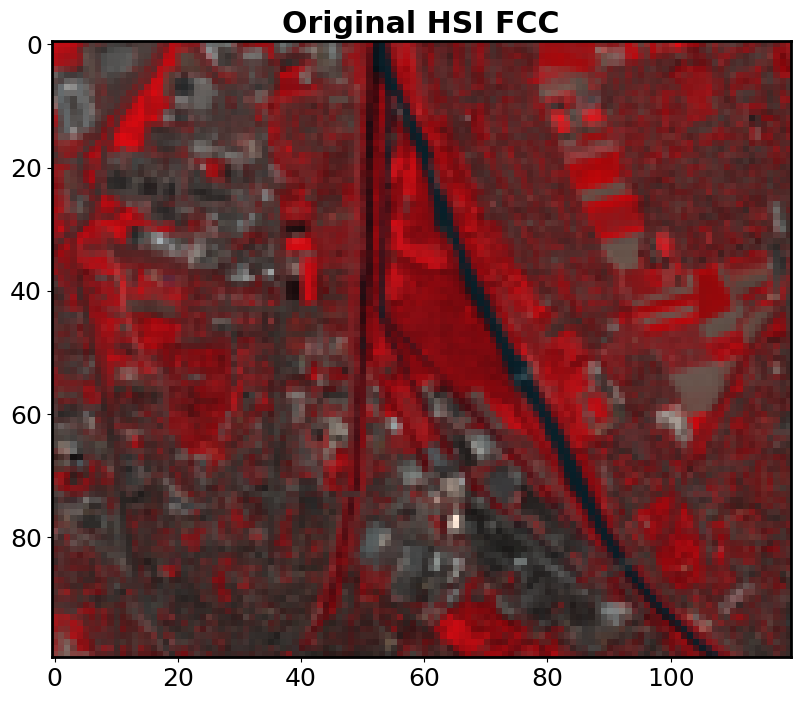

In [6]:
# Select three bands for visualization (adjust indices as needed)
rgb_bands = [65, 45, 35]

# Ensure the selected bands exist in the image
rgb_bands = [b for b in rgb_bands if b < hsi.shape[2]]

# Normalize and plot
plt.figure(figsize=(10, 8))
plt.imshow(np.clip(hsi[..., rgb_bands] / np.nanmax(hsi[..., rgb_bands]), 0, 1))
plt.title("Original HSI FCC", fontweight = 'bold')

# plt.scatter(20, 50, color='red', s=100, marker='o', edgecolors='black')  # s = size of dot

plt.axis("on")
plt.show()

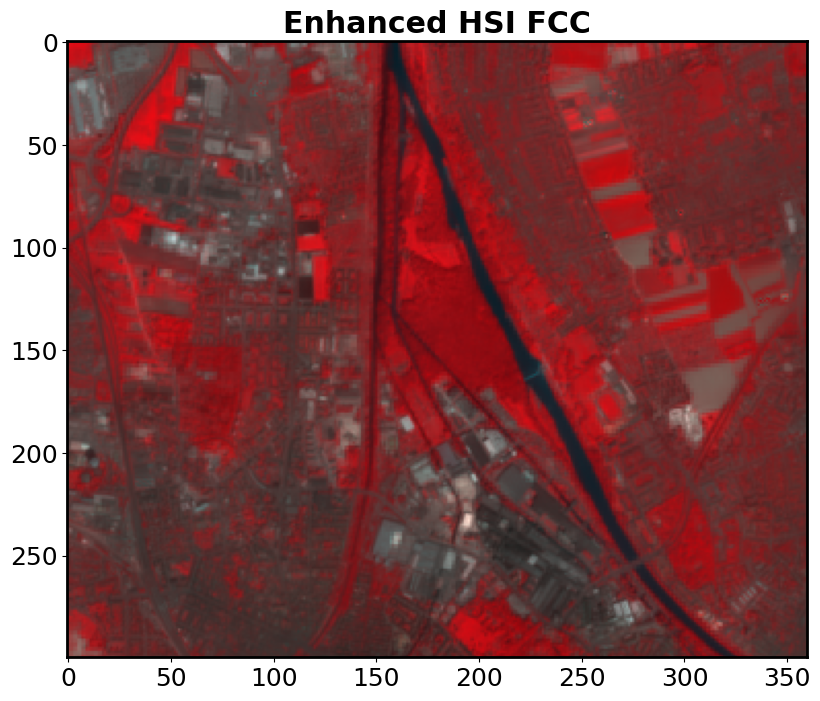

In [7]:
# Select three bands for visualization (adjust indices as needed)
rgb_bands = [65, 45, 35]

# Ensure the selected bands exist in the image
rgb_bands = [b for b in rgb_bands if b < hsi_enhanced.shape[2]]

# Normalize and plot
plt.figure(figsize=(10, 8))
plt.imshow(np.clip(hsi_enhanced[..., rgb_bands] / np.nanmax(hsi_enhanced[..., rgb_bands]), 0, 1))
plt.title("Enhanced HSI FCC", fontweight='bold')

plt.axis("on")
plt.show()